In [11]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
from collections import Counter

In [12]:
DATASETS = {
    "acm": {
        "n_folds": 10
    },
    "20ng": {
        "n_folds": 10
    }
}

In [13]:
is_calib = True

if is_calib:
    CLFS_SET = [
        ["bert", "temperature_scaling"],
        ["xlnet", "temperature_scaling"],
        ["ktmk", "isotonic"],
        ["ktr", "isotonic"],
        ["lstmk", "isotonic"],
        ["lstr", "isotonic"],
        ["ltr", "isotonic"]]
else:
    CLFS_SET = [
        ["bert", "normal_probas"],
        ["xlnet", "normal_probas"],
        ["ktmk", "normal_probas"],
        ["ktr", "normal_probas"],
        ["lstmk", "normal_probas"],
        ["lstr", "normal_probas"],
        ["ltr", "normal_probas"]]

MF_LIST = [
    "centroids-ratios",
    "dist-20",
    "neigborhood",
    "probas",
    "probas-based"]

mf_sufix = '_'.join(sorted(MF_LIST))
mf_sufix

'centroids-ratios_dist-20_neigborhood_probas_probas-based'

In [14]:
DATA_SOURCE = "/home/welton/data/oracle/error_detection"
clf_setup = '/'.join(sorted([ f"{c}_{p}" for c,p in CLFS_SET ]))
clf_setup

'bert_temperature_scaling/ktmk_isotonic/ktr_isotonic/lstmk_isotonic/lstr_isotonic/ltr_isotonic/xlnet_temperature_scaling'

In [15]:
def load_json(json_path: str):

    with open(json_path, "r") as fd:
        return json.load(fd)

def load_pickle(pickle_path: str):

    with open(pickle_path, "rb") as fd:
        return pickle.load(fd)


def plot_feature_ranking(feature_labels: list,
                         feature_imps: np.ndarray,
                         n_feats = 50):

    sort = (1 - feature_imps).argsort()[:n_feats]
    labels = [ feature_labels[idx] for idx in sort ]
    y = [ feature_imps[idx] for idx in sort ]
    x = np.arange(n_feats)
    plt.bar(x, y)
    _ = plt.xticks(ticks=x, labels=labels, rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance (Random Forest)")



def __plot_feature_ranking(feat_freq, n_feats = 25):

    feat_list = [ [feat_name, feat_freq[feat_name]] for feat_name in feat_freq ]
    feat_list.sort(key=lambda x: x[1], reverse=True)
    x = np.arange(n_feats)
    y = [ t[1] for t in feat_list ][:n_feats]
    labels = [ t[0] for t in feat_list ][:n_feats]

    plt.bar(x, y)
    _ = plt.xticks(ticks=x, labels=labels, rotation=90)

    plt.xlabel("Features")
    plt.ylabel("Feature Importance (Acumulado)")

In [16]:
def load_imps(DATASETS: dict, dataset: str) -> tuple:

    n_folds = DATASETS[dataset]["n_folds"]
    feat_labels = None
    feat_imp = {}
    for clf, proba_type in CLFS_SET:
        feat_imp[clf] = {}
        for fold in np.arange(n_folds):
            data_dir = f"{DATA_SOURCE}/{proba_type}/{dataset}/{n_folds}_folds/{clf}/{clf_setup}/{mf_sufix}/{fold}"
            feat_imp[clf][fold] = load(f"{data_dir}/forest").feature_importances_
            if feat_labels is None:
                feat_labels = load_pickle(f"{data_dir}/features_labels.pkl")
    
    return feat_imp, feat_labels

def plot_global_imp(dataset: str,
                    feat_imp: dict,
                    feat_labels: list,
                    n_feats: int = 20):

    imp_list = []
    for clf in feat_imp:
        for fold in feat_imp[clf]:
            imp_list.append(feat_imp[clf][fold])

    mean_imp = np.mean(imp_list, axis=0)
    plot_feature_ranking(feat_labels, mean_imp, n_feats)
    plt.title(dataset.upper())

In [17]:
dataset = "acm"
feat_imp, feat_labels = load_imps(DATASETS, dataset)

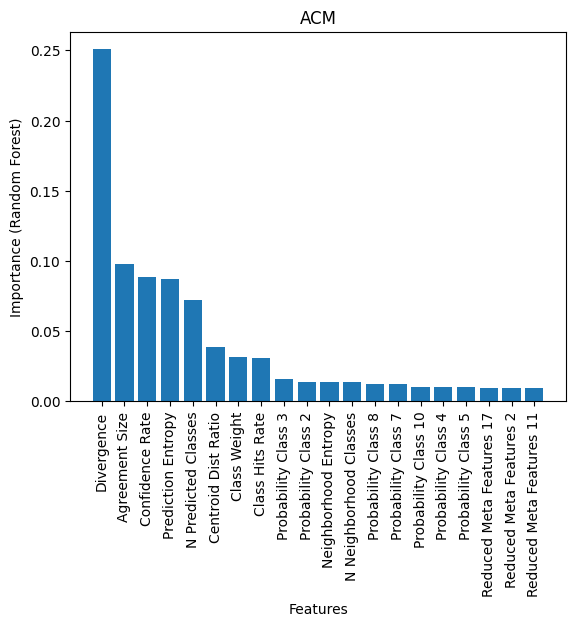

In [18]:
plot_global_imp(dataset, feat_imp, feat_labels)

In [19]:
dataset = "20ng"
feat_imp, feat_labels = load_imps(DATASETS, dataset)

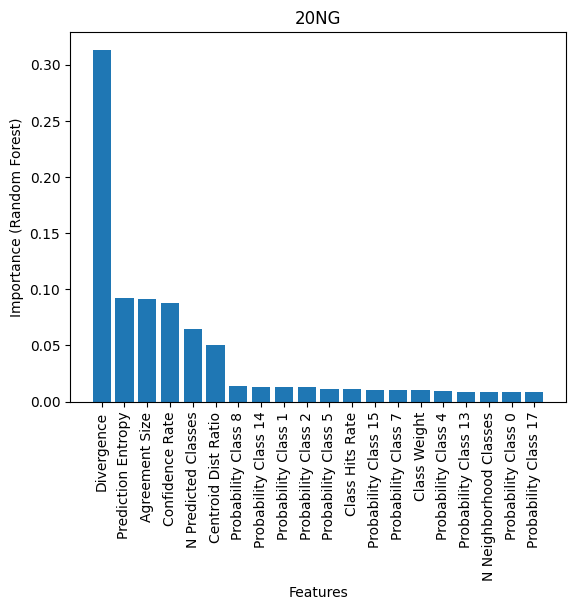

In [20]:
plot_global_imp(dataset, feat_imp, feat_labels)